In [1]:
import pandas as pd

# Assuming the file path is correct and the file is in the same directory as your script or notebook
activedf = pd.read_csv('Active_Final_Clean_Merged_for_Team.csv')

# Check the first few rows to understand the structure
print(activedf.head())

# Check for missing values in key columns
missing_values_check = activedf[['Participant Id', 'Assessment Completed Date', 'Scaled TIMES Score']].isnull().sum()
print("\nMissing values in key columns:\n", missing_values_check)

# Convert 'Assessment Completed Date' to datetime format for time series analysis
activedf['Assessment Completed Date'] = pd.to_datetime(activedf['Assessment Completed Date'])

# Display the data types to confirm the conversion
print("\nData types after conversion:\n", activedf.dtypes)

activedf.info()

    Participant Id  Age Gender   Race                  Education  \
0  0034W00002cNw2x   22  Woman  Black  High school or equivalent   
1  0034W00002cNw2x   22  Woman  Black  High school or equivalent   
2  0034W00002cNw2x   22  Woman  Black  High school or equivalent   
3  0034W00002cNw2x   22  Woman  Black  High school or equivalent   
4  0034W00002cNw2x   22  Woman  Black  High school or equivalent   

  Housing Situation Total Income  \
0     TCHC building   Don't know   
1     TCHC building   Don't know   
2     TCHC building   Don't know   
3     TCHC building   Don't know   
4     TCHC building   Don't know   

                                        Service Name  \
0  {'System Navigation & Advocacy', 'Housing Chec...   
1  {'System Navigation & Advocacy', 'Housing Chec...   
2  {'System Navigation & Advocacy', 'Housing Chec...   
3  {'System Navigation & Advocacy', 'Housing Chec...   
4  {'System Navigation & Advocacy', 'Housing Chec...   

   Number of Service Enrolled Assessm

In [2]:
activedf.info()
# Assuming 'Participant Id' is the column name containing participant IDs
unique_participant_count = activedf['Participant Id'].nunique()

print("Count of Unique Participant IDs:", unique_participant_count)

# Check for missing values in key columns
missing_values_check = activedf[['Participant Id', 'Assessment Completed Date', 'Scaled TIMES Score','Race']].isnull().sum()
print("\nMissing values in key columns:\n", missing_values_check)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Participant Id               1729 non-null   object        
 1   Age                          1729 non-null   int64         
 2   Gender                       1729 non-null   object        
 3   Race                         1729 non-null   object        
 4   Education                    1729 non-null   object        
 5   Housing Situation            1729 non-null   object        
 6   Total Income                 1729 non-null   object        
 7   Service Name                 1729 non-null   object        
 8   Number of Service Enrolled   1729 non-null   int64         
 9   Assessment Completed Date    1729 non-null   datetime64[ns]
 10  Assessment Type              1729 non-null   object        
 11  TIMES Total Scores           1729 non-null 

In [4]:
from scipy.stats import linregress
import pandas as pd



# Function to calculate slope for each participant's Scaled TIMES Score
def calculate_slope(group):
    # Ensure the data is sorted by date for each participant
    group = group.sort_values('Assessment Completed Date')
    # Use linear regression to find the slope of Scaled TIMES Score over time
    # Convert dates to ordinal to get a numerical value for regression
    regression_result = linregress(group['Assessment Completed Date'].map(pd.Timestamp.toordinal), group['Scaled TIMES Score'])
    return pd.Series({'Slope': regression_result.slope})

# Apply the function to each participant group in the dataset
participant_slopes = activedf.groupby('Participant Id').apply(calculate_slope)

# Show the first few rows of the slopes to verify the output
print(participant_slopes.head())


C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_com

                    Slope
Participant Id           
0034W00002cNrbQ  0.008731
0034W00002cNrbR -0.024109
0034W00002cNrbs  0.071867
0034W00002cNrc2  0.011195
0034W00002cNrc5  0.009401


C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_com

In [5]:
# This follows immediately after calculating the slopes for each participant
negative_slope_count = participant_slopes[participant_slopes['Slope'] < 0].count()

# Extract the participant IDs with decreasing scores into a list
participants_with_decreasing_scores = participant_slopes[participant_slopes['Slope'] < 0].index.tolist()

print("Number of participants with decreasing Scaled TIMES Score:", negative_slope_count)
# Assuming 'participant_slopes' contains the slope for each participant's Scaled TIMES Score
participants_with_decreasing_scores = participant_slopes[participant_slopes['Slope'] < 0].index.tolist()



Number of participants with decreasing Scaled TIMES Score: Slope    57
dtype: int64


In [6]:
# Calculate days since the first assessment for each participant
start_dates = activedf.groupby('Participant Id')['Assessment Completed Date'].min()
activedf['Days Since Start'] = activedf.apply(lambda row: (row['Assessment Completed Date'] - start_dates[row['Participant Id']]).days, axis=1)


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

forecasts = {}
for participant_id in participants_with_decreasing_scores:
    data = activedf[activedf['Participant Id'] == participant_id]
    X = data[['Days Since Start']]
    y = data['Scaled TIMES Score']

    model = LinearRegression()
    model.fit(X, y)
    
    # Assuming 90 days for the next quarter
    next_quarter = np.array([[X['Days Since Start'].max() + 90]])
    forecasted_score = model.predict(next_quarter)[0]
    forecasts[participant_id] = forecasted_score

# Convert forecasts to DataFrame
forecasts_df = pd.DataFrame(list(forecasts.items()), columns=['Participant Id', 'Forecasted Scaled TIMES Score'])


C:\Users\Adarsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Adarsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Adarsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Adarsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Adarsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Adarsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does 

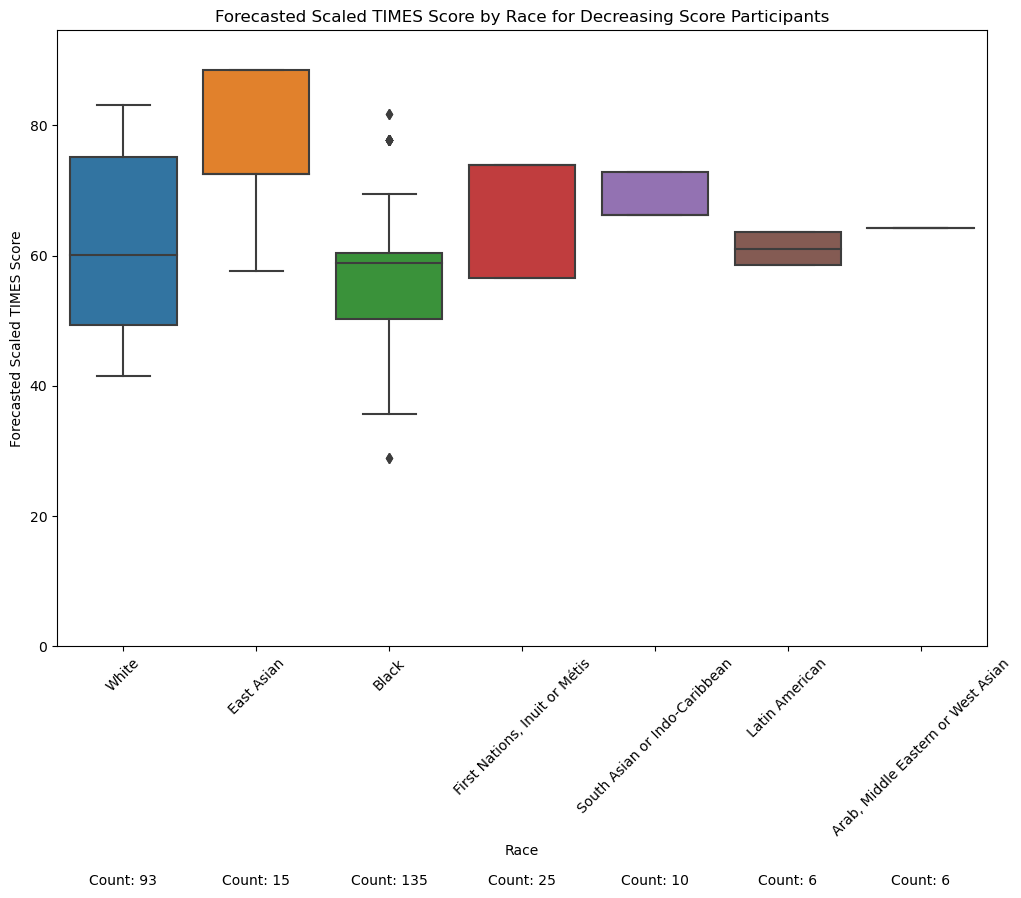

In [17]:
# Ensure forecasts_df only includes those 51 participants by merging with a filtered version of activedf
# This assumes activedf has been filtered to include only the desired races prior to this step.
# If not, you would need to filter activedf by the relevant races first.
filtered_activedf = activedf[activedf['Race'].isin(['White', 'East Asian', 'Black', 'First Nations, Inuit or Métis', 'South Asian or Indo-Caribbean', 'Latin American', 'Arab, Middle Eastern or West Asian'])]
filtered_forecasts_df = forecasts_df.merge(filtered_activedf[['Participant Id', 'Race']], on='Participant Id', how='inner')

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the filtered forecasted scores
plt.figure(figsize=(12, 8))
sns.boxplot(x='Race', y='Forecasted Scaled TIMES Score', data=filtered_forecasts_df)
plt.title('Forecasted Scaled TIMES Score by Race for Decreasing Score Participants')
plt.xticks(rotation=45)
plt.ylabel('Forecasted Scaled TIMES Score')
plt.xlabel('Race')

# Adding participant counts per race category
race_counts = filtered_forecasts_df['Race'].value_counts()
for i, race in enumerate(filtered_forecasts_df['Race'].unique()):
    count = race_counts.loc[race]
    plt.text(i, filtered_forecasts_df['Forecasted Scaled TIMES Score'].min() - 2, f'Count: {count}', ha='center')

plt.ylim(bottom=0)  # Ensure the y-axis starts at 0 if your data allows
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

cv_mse_scores = []

for participant_id in participants_with_decreasing_scores:
    data = activedf[activedf['Participant Id'] == participant_id]
    if len(data) < 3:  # Ensuring at least 3 data points for CV
        print(f"Insufficient data for CV for participant ID {participant_id}")
        continue
    
    # Dynamic adjustment of folds based on the number of available samples
    n_folds = min(5, len(data) - 1)
    
    X = np.array(data['Days Since Start']).reshape(-1, 1)
    y = data['Scaled TIMES Score']
    
    model = LinearRegression()
    
    # Perform cross-validation and store negative MSE scores
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=n_folds)
    
    # Convert negative MSE scores to positive and calculate average
    cv_mse_scores.append(-scores.mean())

# Calculate and display the average MSE across participants
if cv_mse_scores:
    average_mse = np.mean(cv_mse_scores)
    print(f'Average MSE from cross-validation: {average_mse}')
else:
    print("Insufficient data across all participants for cross-validation.")


Insufficient data for CV for participant ID 0034W00002cNsZi
Insufficient data for CV for participant ID 0034W00002oCitU
Insufficient data for CV for participant ID 0034W00002pjXd4
Insufficient data for CV for participant ID 0034W00002yrj3s
Insufficient data for CV for participant ID 0034W000030Jq0F
Insufficient data for CV for participant ID 003JB000001XTLp
Insufficient data for CV for participant ID 003JB000001b5Qo
Insufficient data for CV for participant ID 003JB000001gxBu
Insufficient data for CV for participant ID 003JB000002CuKh
Insufficient data for CV for participant ID 003JB000002D9Xb
Insufficient data for CV for participant ID 003JB000002H7ku
Insufficient data for CV for participant ID 003JB000002IjT4
Average MSE from cross-validation: 55.50883962497205


C:\Users\Adarsh\AppData\Local\Temp\ipykernel_6960\2694414640.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiftyonedf['Service Name'] = fiftyonedf['Service Name'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)


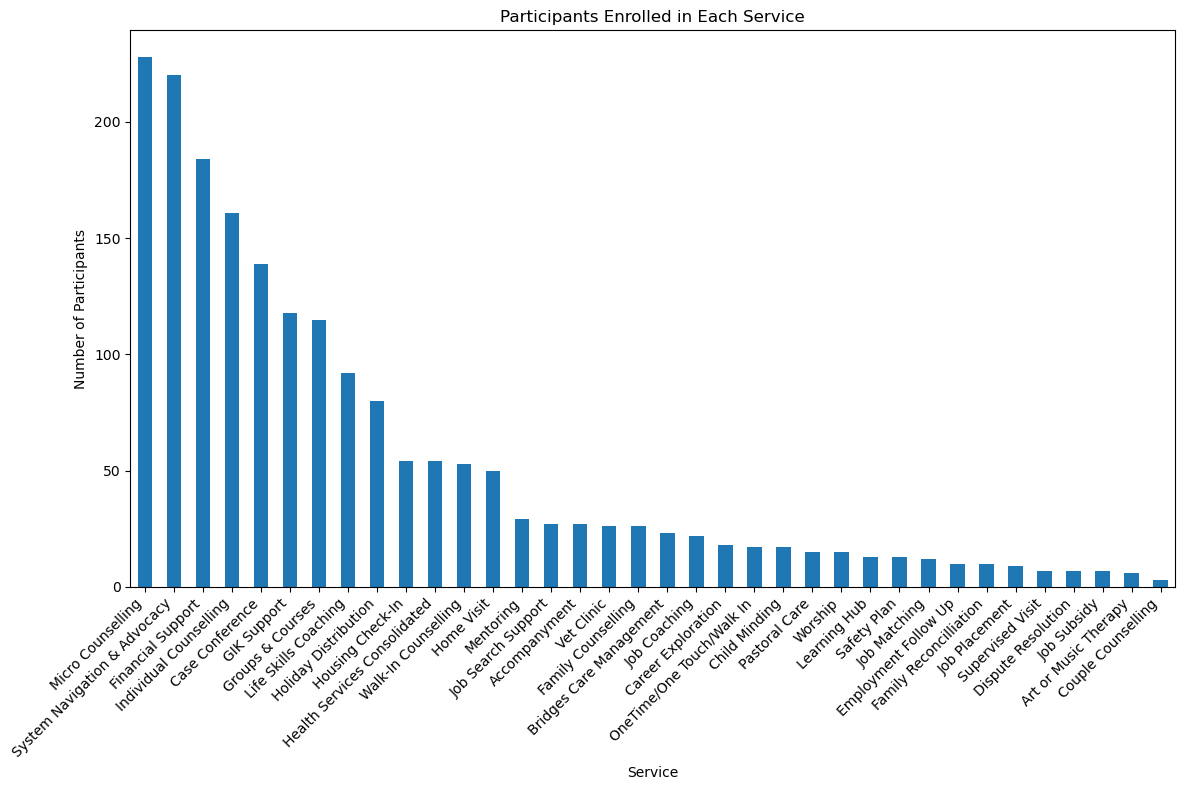

In [19]:
# Ensure the 'literal_eval' function is imported
from ast import literal_eval
import matplotlib.pyplot as plt

# Filter the original DataFrame for only the participants with decreasing scores
fiftyonedf = activedf[activedf['Participant Id'].isin(participants_with_decreasing_scores)]

# Convert 'Service Name' from string representation of list to actual list
fiftyonedf['Service Name'] = fiftyonedf['Service Name'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Explode the DataFrame on 'Service Name' so each row corresponds to a single service for a participant
exploded_services_df = fiftyonedf.explode('Service Name')

# Count how many times each service appears (i.e., how many participants are enrolled in each service)
service_counts = exploded_services_df['Service Name'].value_counts()

# Plotting the counts of participants enrolled in each service
plt.figure(figsize=(12, 8))
service_counts.plot(kind='bar')
plt.title('Participants Enrolled in Each Service')
plt.xlabel('Service')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Load the dataset
activedf = pd.read_csv('Active_Final_Clean_Merged_for_Team.csv')
# Convert 'Assessment Completed Date' to datetime
activedf['Assessment Completed Date'] = pd.to_datetime(activedf['Assessment Completed Date'])

# Initial data check
print("Initial Data Check:\n", activedf.head())
print("\nMissing Values in Key Columns:\n", activedf[['Participant Id', 'Assessment Completed Date', 'Scaled TIMES Score']].isnull().sum())


Initial Data Check:
     Participant Id  Age Gender   Race                  Education  \
0  0034W00002cNw2x   22  Woman  Black  High school or equivalent   
1  0034W00002cNw2x   22  Woman  Black  High school or equivalent   
2  0034W00002cNw2x   22  Woman  Black  High school or equivalent   
3  0034W00002cNw2x   22  Woman  Black  High school or equivalent   
4  0034W00002cNw2x   22  Woman  Black  High school or equivalent   

  Housing Situation Total Income  \
0     TCHC building   Don't know   
1     TCHC building   Don't know   
2     TCHC building   Don't know   
3     TCHC building   Don't know   
4     TCHC building   Don't know   

                                        Service Name  \
0  {'System Navigation & Advocacy', 'Housing Chec...   
1  {'System Navigation & Advocacy', 'Housing Chec...   
2  {'System Navigation & Advocacy', 'Housing Chec...   
3  {'System Navigation & Advocacy', 'Housing Chec...   
4  {'System Navigation & Advocacy', 'Housing Chec...   

   Number of Ser

In [19]:
# Count of unique participants and checking missing values
unique_participant_count = activedf['Participant Id'].nunique()
print("\nCount of Unique Participant IDs:", unique_participant_count)
print("\nMissing values in 'Participant Id', 'Assessment Completed Date', 'Scaled TIMES Score', and 'Race':\n", activedf[['Participant Id', 'Assessment Completed Date', 'Scaled TIMES Score', 'Race']].isnull().sum())



Count of Unique Participant IDs: 309

Missing values in 'Participant Id', 'Assessment Completed Date', 'Scaled TIMES Score', and 'Race':
 Participant Id               0
Assessment Completed Date    0
Scaled TIMES Score           0
Race                         0
dtype: int64


In [20]:
from scipy.stats import linregress

def calculate_slope(group):
    group = group.sort_values('Assessment Completed Date')
    regression_result = linregress(group['Assessment Completed Date'].map(pd.Timestamp.toordinal), group['Scaled TIMES Score'])
    return pd.Series({'Slope': regression_result.slope})

participant_slopes = activedf.groupby('Participant Id').apply(calculate_slope)
print("\nParticipant Slopes:\n", participant_slopes.head())


C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_com


Participant Slopes:
                     Slope
Participant Id           
0034W00002cNrbQ  0.008731
0034W00002cNrbR -0.024109
0034W00002cNrbs  0.071867
0034W00002cNrc2  0.011195
0034W00002cNrc5  0.009401


C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Adarsh\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_com

In [29]:
# Step 1: Filter activedf for participants with decreasing scores
decreasing_scores_df = activedf[activedf['Participant Id'].isin(participants_with_decreasing_scores)]

# Step 2: Exclude participants based on race categories
filtered_decreasing_scores_df = decreasing_scores_df[~decreasing_scores_df['Race'].isin(["Prefer not to answer", "Not listed, please describe"])]

# Step 3: Update the list of participants with decreasing scores after filtering by race
participants_with_decreasing_scores_filtered = filtered_decreasing_scores_df['Participant Id'].unique().tolist()

print("\nNumber of Participants with Decreasing Scaled TIMES Score after filtering by race:", len(participants_with_decreasing_scores_filtered))



Number of Participants with Decreasing Scaled TIMES Score after filtering by race: 51


In [30]:
# Calculate days since the first assessment for each participant
start_dates = activedf.groupby('Participant Id')['Assessment Completed Date'].min()
activedf['Days Since Start'] = activedf.apply(lambda row: (row['Assessment Completed Date'] - start_dates[row['Participant Id']]).days, axis=1)


In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create an empty DataFrame for forecasts
forecasts = []

# Loop over each participant ID to forecast their next quarter's scaled time score
for participant_id in participants_with_decreasing_scores_filtered:
    participant_data = activedf[activedf['Participant Id'] == participant_id]
    
    # Ensure there's enough data for forecasting
    if len(participant_data) < 2:
        continue
    
    X = participant_data[['Days Since Start']].values
    y = participant_data['Scaled TIMES Score'].values
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Forecast the next quarter's score, assuming 90 days after the last record
    next_quarter_days = np.max(X) + 90
    forecasted_score = model.predict([[next_quarter_days]])
    
    # Store the forecasted score along with the participant ID
    forecasts.append((participant_id, forecasted_score[0]))

# Convert the list of forecasts into a DataFrame
forecasts_df = pd.DataFrame(forecasts, columns=['Participant Id', 'Forecasted Scaled TIMES Score'])


In [35]:
# Merge the forecasts with the original DataFrame to get race information
forecasts_with_race = forecasts_df.merge(activedf[['Participant Id', 'Race']].drop_duplicates(), on='Participant Id')


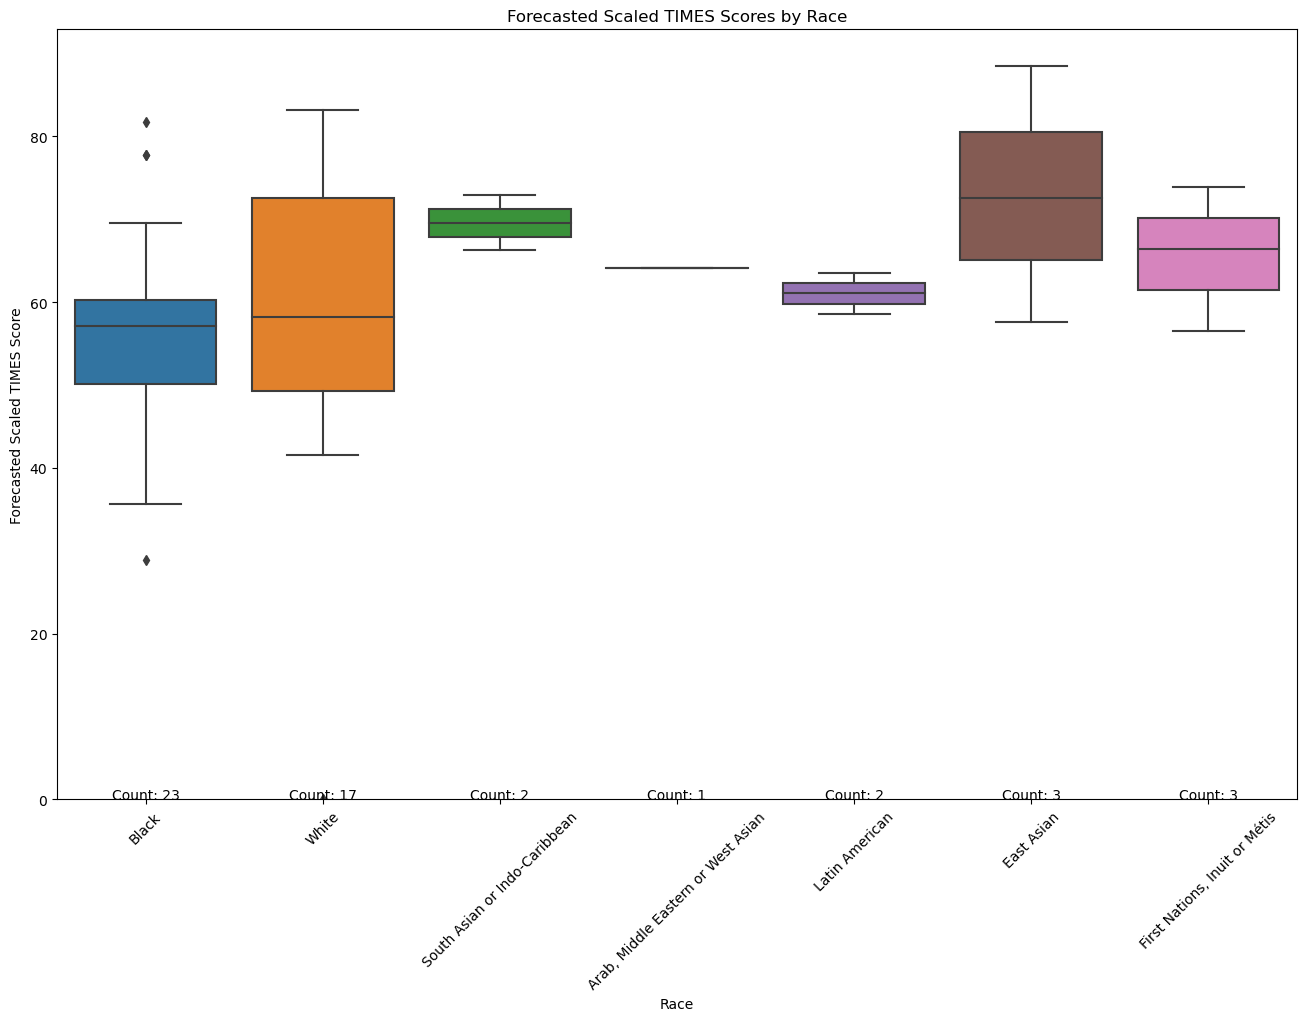

In [38]:
# Ensure no negative scores in the forecast
desired_forecasts_with_race['Forecasted Scaled TIMES Score'] = desired_forecasts_with_race['Forecasted Scaled TIMES Score'].clip(lower=0)

plt.figure(figsize=(16, 10))
sns.boxplot(x='Race', y='Forecasted Scaled TIMES Score', data=desired_forecasts_with_race)
plt.title('Forecasted Scaled TIMES Scores by Race')

# Calculate the number of participants in each race category within the filtered forecasts
race_counts = desired_forecasts_with_race['Race'].value_counts()

# Add annotations for counts
for i, race in enumerate(desired_forecasts_with_race['Race'].unique()):
    plt.text(i, desired_forecasts_with_race['Forecasted Scaled TIMES Score'].min() * 0.95, f'Count: {race_counts[race]}', horizontalalignment='center')

plt.xticks(rotation=45)
plt.ylim(bottom=0)  # Ensuring y-axis starts from 0
plt.show()


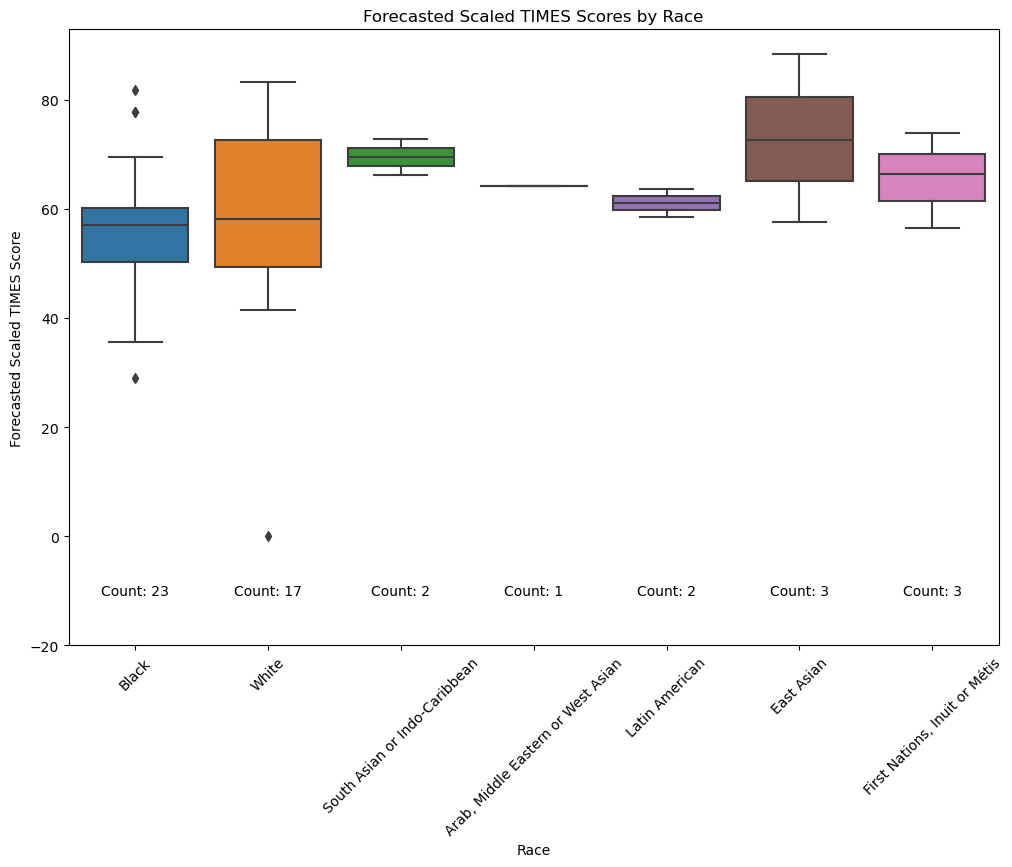

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Race', y='Forecasted Scaled TIMES Score', data=desired_forecasts_with_race)
plt.title('Forecasted Scaled TIMES Scores by Race')

# Calculate the number of participants in each race category within the filtered forecasts
race_counts = desired_forecasts_with_race['Race'].value_counts()

# Add annotations for counts above the x-axis labels
for i, race in enumerate(desired_forecasts_with_race['Race'].unique()):
    plt.text(i, -10, f'Count: {race_counts[race]}', horizontalalignment='center', verticalalignment='center')

plt.xticks(rotation=45)
plt.ylim(bottom=desired_forecasts_with_race['Forecasted Scaled TIMES Score'].min() - 20)  # Adjust if necessary, setting a buffer below the lowest forecasted score
plt.show()


C:\Users\Adarsh\AppData\Local\Temp\ipykernel_1172\193123161.py:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (race, count) in enumerate(counts.iteritems()):


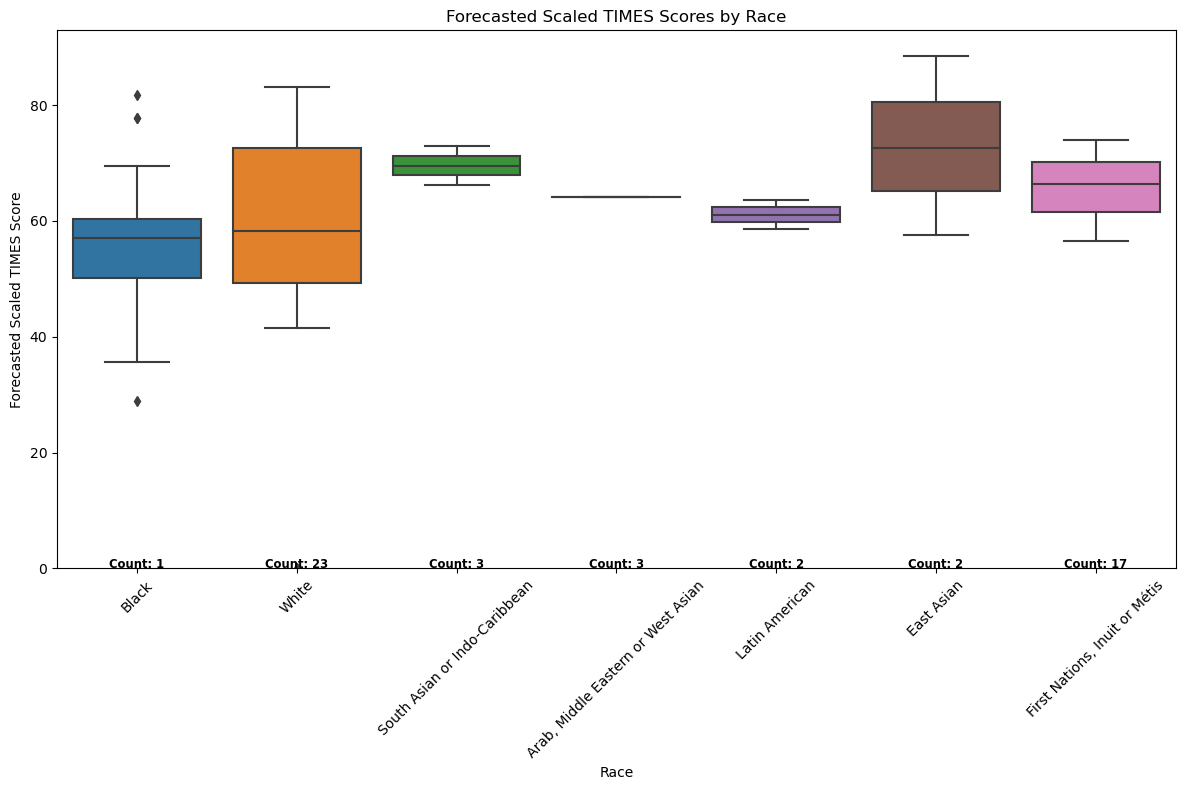

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'forecasts_with_race' is the DataFrame with your forecast data including race
# Filter out undesired race categories if there's any left
desired_forecasts_with_race = forecasts_with_race[forecasts_with_race['Race'].isin(["White", "East Asian", "Black", "First Nations, Inuit or Métis", "South Asian or Indo-Caribbean", "Latin American", "Arab, Middle Eastern or West Asian"])]

# Ensuring no negative forecasted scores are included
desired_forecasts_with_race['Forecasted Scaled TIMES Score'] = desired_forecasts_with_race['Forecasted Scaled TIMES Score'].clip(lower=0)

# Begin plotting
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='Race', y='Forecasted Scaled TIMES Score', data=desired_forecasts_with_race)
plt.title('Forecasted Scaled TIMES Scores by Race')
plt.xticks(rotation=45)

# Adjust y-axis to start at 0
plt.ylim(0, None)

# Annotating the counts below the boxplot with enough offset
counts = desired_forecasts_with_race['Race'].value_counts().sort_index()
for i, (race, count) in enumerate(counts.iteritems()):
    box_plot.text(i, desired_forecasts_with_race['Forecasted Scaled TIMES Score'].min() * 1.1, f'Count: {count}', 
                  horizontalalignment='center', size='small', color='black', weight='semibold')

plt.tight_layout()
plt.show()
